### A question by @jamestanton Oct 9, 2018

N has 1 digit in base N+1 and more digits in base 2. Let A(N) be the average number of digits of N when represented in bases 2,3,...,N+1.

Graph? Bounds? Limits?


In [1]:
? digits

search: digits digits! ndigits isdigit isxdigit disable_sigint



```
digits([T<:Integer], n::Integer; base::T = 10, pad::Integer = 1)
```

Return an array with element type `T` (default `Int`) of the digits of `n` in the given base, optionally padded with zeros to a specified size. More significant digits are at higher indices, such that `n == sum([digits[k]*base^(k-1) for k=1:length(digits)])`.

# Examples

```jldoctest
julia> digits(10, base = 10)
2-element Array{Int64,1}:
 0
 1

julia> digits(10, base = 2)
4-element Array{Int64,1}:
 0
 1
 0
 1

julia> digits(10, base = 2, pad = 6)
6-element Array{Int64,1}:
 0
 1
 0
 1
 0
 0
```


In [2]:
digits(209)

3-element Array{Int64,1}:
 9
 0
 2

In [3]:
digits(9,base = 2)

4-element Array{Int64,1}:
 1
 0
 0
 1

9 in base 2 is 1001

221 in base 4 is 26 in base 10?
2*1 + 2*4 + 1*16 

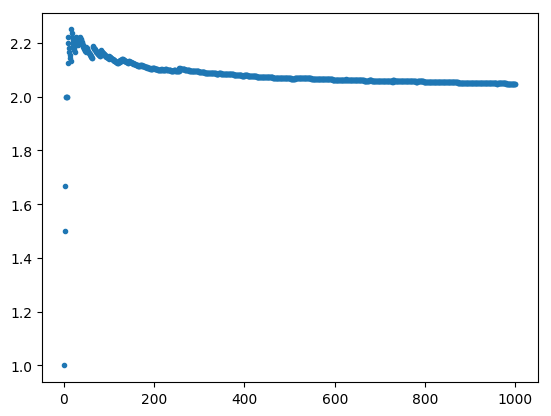

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3dff9eb990>

In [16]:
using Statistics, PyPlot
A(N) = mean([ length(digits(N,base = b)) for b in 2:N+1])
Nmax = 1000
plot(1:Nmax,A.(1:Nmax),".")

In [19]:
A(3*10^4)

2.007833333333333

Conjecture:  
$ \lim_{N \to \infty} A(N) = 2$

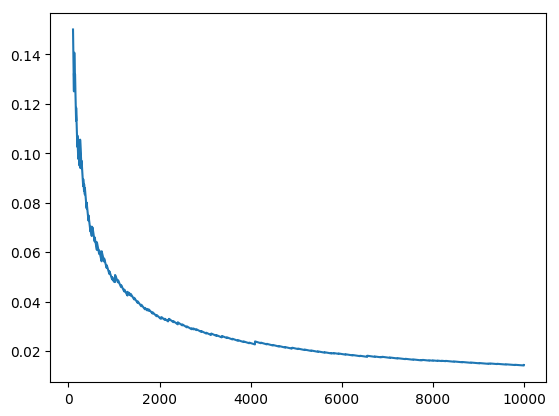

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3dff95ed90>

In [20]:
errs = [A(N) - 2 for N in 100:10000]
plot(100:10000,errs)

number = $\sum_{k=1}^n d_k b^{k-1}$

In [44]:
N = 34234
b = 8
dig = digits(N,base = b)
println(dig)
sum([dig[k]*b^(k-1)  for k in 1:length(dig)])

[2, 7, 6, 2, 0, 1]


34234

In [45]:
parse(Int,"102672", base = 8)

34234

0,1,2,3,...,9,A,B,C,D,E,F  Hex

In [29]:
0xFF + 1

256

In [35]:
0xFEB4 - 1 + 1

65204

In [34]:
N = 18
b = 16
digits(N,base = b)

2-element Array{Int64,1}:
 2
 1

In [43]:
? parse

search: parse tryparse partialsortperm partialsortperm! pairs skipchars



```
parse(type, str; base)
```

Parse a string as a number. For `Integer` types, a base can be specified (the default is 10). For floating-point types, the string is parsed as a decimal floating-point number.  `Complex` types are parsed from decimal strings of the form `"R±Iim"` as a `Complex(R,I)` of the requested type; `"i"` or `"j"` can also be used instead of `"im"`, and `"R"` or `"Iim"` are also permitted. If the string does not contain a valid number, an error is raised.

# Examples

```jldoctest
julia> parse(Int, "1234")
1234

julia> parse(Int, "1234", base = 5)
194

julia> parse(Int, "afc", base = 16)
2812

julia> parse(Float64, "1.2e-3")
0.0012

julia> parse(Complex{Float64}, "3.2e-1 + 4.5im")
0.32 + 4.5im
```

---

```
parse(Colorant, desc)
```

Parse a color description.

This parses subset of HTML/CSS color specifications. In particular, everything is supported but: "currentColor".

It does support named colors (though it uses X11 named colors, which are slightly different than W3C named colors in some cases), "rgb()", "hsl()", "#RGB", and "#RRGGBB' syntax.

Args:

  * `Colorant`: literal "Colorant" will parse according to the `desc`

string (usually returning an `RGB`); any more specific choice will return a color of the specified type.

  * `desc`: A color name or description.

Returns:   An `RGB{N0f8}` color, unless:     - "hsl(h,s,l)" was used, in which case an `HSL` color;     - "rgba(r,g,b,a)" was used, in which case an `RGBA` color;     - "hsla(h,s,l,a)" was used, in which case an `HSLA` color;     - a specific `Colorant` type was specified in the first argument


In [46]:
bitstring(19)

"0000000000000000000000000000000000000000000000000000000000010011"

N->1 machine....
10->1
2-> 1


 |   |   |   * | **  |

In [47]:
bitstring(5)

"0000000000000000000000000000000000000000000000000000000000000101"

In [48]:
M = 5 
b = 10
#The b->1 machine
function explode(arr)
   newArr = copy(arr)  #creates a copy of the array so we can work on it....  
   for k in 1:M-1 
      if arr[k] >= b
         #do an explosion... and quit...
         newArr[k] -= b
         newArr[k+1] += 1 
         return newArr   
      end
   end
   return newArr 
end

explode (generic function with 1 method)

In [51]:
explode([12,2,11,0,0])

5-element Array{Int64,1}:
  2
  3
 11
  0
  0

In [52]:
explode(explode([12,2,11,0,0]))

5-element Array{Int64,1}:
 2
 3
 1
 1
 0

In [54]:
explode([213,0,0,0,0])

5-element Array{Int64,1}:
 203
   1
   0
   0
   0

In [55]:
explode(Out[54])

5-element Array{Int64,1}:
 193
   2
   0
   0
   0

In [56]:
explode(Out[55])

5-element Array{Int64,1}:
 183
   3
   0
   0
   0

In [58]:
b = 2 
arr = [19,0,0,0,0]
while true
    println(arr)
    newArr = explode(arr)
    if newArr == arr #if no explosion
        break
    end
    arr = newArr
end

[19, 0, 0, 0, 0]
[17, 1, 0, 0, 0]
[15, 2, 0, 0, 0]
[13, 3, 0, 0, 0]
[11, 4, 0, 0, 0]
[9, 5, 0, 0, 0]
[7, 6, 0, 0, 0]
[5, 7, 0, 0, 0]
[3, 8, 0, 0, 0]
[1, 9, 0, 0, 0]
[1, 7, 1, 0, 0]
[1, 5, 2, 0, 0]
[1, 3, 3, 0, 0]
[1, 1, 4, 0, 0]
[1, 1, 2, 1, 0]
[1, 1, 0, 2, 0]
[1, 1, 0, 0, 1]


In [59]:
bitstring(19)

"0000000000000000000000000000000000000000000000000000000000010011"

In [ ]:
#try to make a function that takes an array, number1 in b1 (a base) and returns an array of digits in newBase
convert(number1,b1,newBase)